In [13]:
import pandas as pd

housing = pd.read_csv("datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
import numpy as np

np.random.seed(42)
#np.random.permutation(10)
#np.random.seed()

def split_trian_test(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    testsize =  int(len(data)* test_ratio)
    test_indices = shuffle_indices[:testsize]
    train_indices = shuffle_indices[testsize:]
    (train_data, test_data) = (data.iloc[train_indices], data.iloc[test_indices])
    return (train_data, test_data)

In [15]:
(train_data, test_data) = split_trian_test(housing, 0.2)   

In [16]:
from sklearn.model_selection import train_test_split

(train_data, test_data) = train_test_split(housing, test_size=0.2, random_state=42)
#train_data
#print(len(test_data))


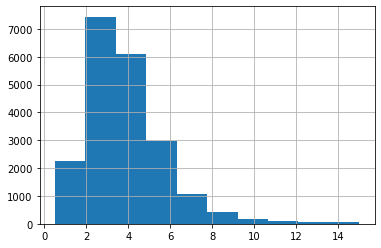

In [17]:
housing['median_income'].hist()

In [18]:
housing['income_category'] = pd.cut(housing['median_income'], bins = [0,1.5,3.0,4.5,6.0,np.inf], labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])

In [19]:
print(housing['income_category'].value_counts())

cat3    7236
cat2    6581
cat4    3639
cat5    2362
cat1     822
Name: income_category, dtype: int64


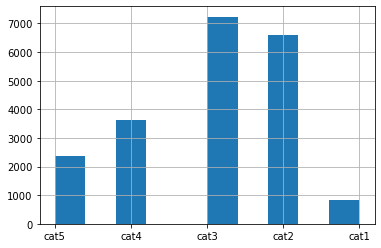

In [20]:
housing['income_category'].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

strata = split.split(housing, housing["income_category"])
for train_indices, test_indices in strata:
    strata_train_set = housing.loc[train_indices]
    strata_test_set = housing.loc[test_indices]

In [22]:
#strata_train_set['income_category'].value_counts()
strata_test_set['income_category'].value_counts() / len(strata_test_set)

cat3    0.350533
cat2    0.318798
cat4    0.176357
cat5    0.114583
cat1    0.039729
Name: income_category, dtype: float64

In [23]:
housing["income_category"].value_counts() / len(housing)

cat3    0.350581
cat2    0.318847
cat4    0.176308
cat5    0.114438
cat1    0.039826
Name: income_category, dtype: float64

In [24]:
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strata_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [25]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
cat1,0.039826,0.039729,0.040213,0.973236,-0.243309
cat2,0.318847,0.318798,0.324370,1.732260,-0.015195
cat3,0.350581,0.350533,0.358527,2.266446,-0.013820
cat4,0.176308,0.176357,0.167393,-5.056334,0.027480
cat5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [26]:
strata_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,cat2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,cat5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,cat2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,cat2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,cat3


In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [28]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [29]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
Name: median_house_value, dtype: float64

(0.0, 16.0, 0.0, 550000.0)

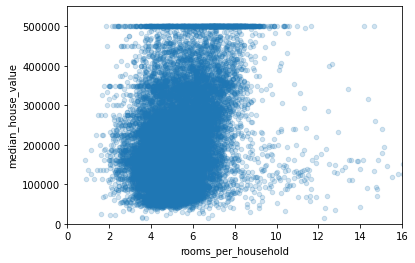

In [30]:
import matplotlib.pyplot as plt
housing.plot(kind = "scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0,16,0,550000])
#plt.show()

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.476104,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006029,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.048889,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.099631,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


In [32]:
# Prepare the Data for Machine learning Algorithm

print(strata_train_set.describe())
strata_test_set.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575834     35.639577           28.653101   2622.728319   
std        2.001860      2.138058           12.574726   2138.458419   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.500000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.973890   1419.790819    497.060380       3.875589   
std        412.699041   1115.686241    375.720845       1.904950   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.0

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.00000,4128.000000,4128.000000
mean,-119.545187,35.600998,28.585029,2687.902132,549.484187,1448.220446,509.45688,3.850998,206315.401647
std,2.010260,2.127489,12.630172,2345.868226,454.414696,1197.088364,407.59254,1.879270,114170.048854
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.00000,0.499900,14999.000000
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.00000,2.543000,118975.000000
50%,-118.455000,34.220000,28.000000,2158.500000,441.000000,1172.000000,416.00000,3.514750,181300.000000
75%,-117.980000,37.690000,37.000000,3171.000000,653.000000,1754.000000,613.00000,4.739700,269025.000000
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.00000,15.000100,500001.000000


In [33]:
# drop label for training set
housing_labels = strata_train_set["median_house_value"].copy()
housing = strata_train_set.drop("median_house_value", axis=1)

In [34]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,cat2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,cat4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,cat4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,cat2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,cat3
...,...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN,cat2
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,cat3
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND,cat2
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN,cat4


In [35]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option-1
sample_incomplete_rows.drop("total_bedrooms", axis=1)    # option-2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_category
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,cat2
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,cat4
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,cat4
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,cat2
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,cat3
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,1886.0,769.0,2.6036,<1H OCEAN,cat2
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN,cat3
6052,-117.76,34.04,34.0,1914.0,1564.0,328.0,2.8347,INLAND,cat2
17198,-119.75,34.45,6.0,2864.0,1404.0,603.0,5.5073,NEAR OCEAN,cat4


In [36]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)     # Option-3: Fill with Median
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,cat2
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,cat4
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,cat4
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,cat2
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,cat3
...,...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036,<1H OCEAN,cat2
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN,cat3
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347,INLAND,cat2
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073,NEAR OCEAN,cat4


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [38]:
# Remove the text attributes because median only works for numeric attributes
#housing_numeric = housing.drop("ocean_proximity", axis=1)
housing_numeric = housing.select_dtypes(include=[np.number])

In [39]:
imputer.fit(housing_numeric)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
housing_numeric.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [41]:
X =imputer.transform(housing_numeric)

In [42]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [43]:
housing_training = pd.DataFrame(X, columns = housing_numeric.columns, index=housing_numeric.index )

In [44]:
housing_training.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662
...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073


In [45]:
imputer.strategy

'median'

In [46]:
# Process Categorical Feature - ocean_proximity
housing_ocean_cat = housing[["ocean_proximity"]]
housing_ocean_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [47]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
housing_ocean_cat_encoded = ord_encoder.fit_transform(housing_ocean_cat)
housing_ocean_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [48]:
# Ordinal encoder may confuse model thinking that data has some order. due to its order or < > relations. Since there is no relation, so it shouldnt represent this.
ord_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
# To avoid ordering confusion, we'll use OneHotEncode
# By default OnehotEncoder returns sparse array, to convert into dense array, use toarray()

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_ocean_cat_1hot = cat_encoder.fit_transform(housing_ocean_cat)
housing_ocean_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
# Alternatively we can say sparse = False
cat_encoder = OneHotEncoder(sparse=False)
housing_ocean_cat_1hot = cat_encoder.fit_transform(housing_ocean_cat)
housing_ocean_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [51]:
# StandardScaler()

from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit_transform(data))

print("---------------")
print(scaler.mean_)

print("---------------")
print(scaler.transform([[2,2]]))
print("---------------")
print(scaler.inverse_transform([[3.,3.]]))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
---------------
[0.5 0.5]
---------------
[[3. 3.]]
---------------
[[2. 2.]]


In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [53]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"], index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,cat2,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,cat5,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,cat2,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,cat2,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,cat3,4.50581,3.04785


In [54]:
# Build pipeline to process numerical attributes

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
("imputer", SimpleImputer(strategy="median")),
("attribs_adder", CombinedAttributesAdder()),
("std_scaler", StandardScaler())
])

housing_numeric_training = num_pipeline.fit_transform(housing_numeric)

In [56]:
#housing_numeric_training
#housing = housing.drop("income_category", axis=1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,cat2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,cat5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,cat2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,cat2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,cat3
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,cat4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,cat2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,cat3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,cat3


In [57]:
from sklearn.compose import ColumnTransformer

num_attribs= list(housing_numeric)
cat_attrib = ["ocean_proximity"]

full_pipeline  = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attrib) ])

housing_prepared = full_pipeline.fit_transform(housing)

In [58]:
housing_prepared.shape

(16512, 16)

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [60]:
num_attribs = list(housing_numeric)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [61]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [62]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
#housing_prepared
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [64]:
# Select and Train Model

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [65]:
# Lets try Full Preprocessing pipeline on few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
#some_data

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions :", linear_reg.predict(some_data_prepared))
#print(pred)


Predictions : [210656. 317792. 211328.  59168. 189824.]


In [66]:
#some_data_prepared.shape
housing_prepared.shape

(16512, 16)

In [67]:
from sklearn.metrics import mean_squared_error

housing_predictions = linear_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68629.3260519741

In [68]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49436.263141957366

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

In [70]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [71]:
# Fine tune Model

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-scores)

In [72]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_score)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004
